<a href="https://colab.research.google.com/github/wakaba-james/AI-model-to-predict-a-FIFA-player-s-overall-rating./blob/main/Player_performance_rating_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCTION**

In this project, we're building a deep learning model to predict a FIFA player's overall rating based on important performance attributes like passing, dribbling, physicality, and defensive skills.

Using an Artificial Neural Network (ANN), the model will analyze player stats, recognize patterns, and generate accurate predictions. This can be especially useful for scouts, analysts, and gamers who **want** to evaluate a player's potential.

Before training the model, we will clean and preprocess the dataset by handling missing values, normalizing features, and fine-tuning the model’s performance through hyperparameter tuning.

The goal is to make the prediction process as reliable and insightful as possible!

**Brief Overview of the model**

The model does a solid job of predicting FIFA player ratings based on their skills and attributes. A low Mean Absolute Error (MAE) means the predictions are pretty close to the real ratings, and the Root Mean Squared Error (RMSE) helps gauge consistency. When we compare actual vs. predicted ratings in a scatter plot, we get a clear picture of how well the model understands player performance. Attributes like dribbling, passing, and stamina play the biggest role in determining a player’s rating, just like they do in real-world scouting.

In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
# import all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import layers

from tensorflow.keras.optimizers import Adam

import keras_tuner as kt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
#Loading fifa dataset
df = pd.read_csv("/content/sample_data/Career Mode player datasets - FIFA 15-22.csv", encoding="ISO-8859-1")
new_df = pd.DataFrame(df)
new_df.head()

<ipython-input-29-6a4747098bcc>:2: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/sample_data/Career Mode player datasets - FIFA 15-22.csv", encoding="ISO-8859-1")


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [ ]:
#checking the shape of the dataset

new_df.shape

(19239, 110)

In [ ]:
# Drop irrelevant columns
columns_to_keep = [
    "pace", "shooting", "passing", "dribbling", "defending", "physic",
    "attacking_crossing", "attacking_finishing", "attacking_short_passing",
    "skill_dribbling", "skill_curve", "skill_fk_accuracy", "skill_long_passing",
    "movement_acceleration", "movement_sprint_speed", "movement_agility",
    "power_shot_power", "power_stamina", "power_strength",
    "mentality_aggression", "mentality_vision", "mentality_composure",
    "defending_marking_awareness", "defending_standing_tackle", "defending_sliding_tackle"
]

# Keeping only the selected columns and the target variable which is (Overall Rating)
df = df[columns_to_keep + ["overall"]]
df


,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_short_passing,skill_dribbling,...,power_shot_power,power_stamina,power_strength,mentality_aggression,mentality_vision,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,overall
0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,91,96,...,86,72,69,44,95,96,20,35,24,93
1,78.0,92.0,79.0,86.0,44.0,82.0,71,95,85,85,...,90,76,86,81,81,88,35,42,19,92
2,87.0,94.0,80.0,88.0,34.0,75.0,87,95,80,88,...,94,77,77,63,76,95,24,32,24,91
3,91.0,83.0,86.0,94.0,37.0,63.0,85,83,86,95,...,80,81,53,63,90,93,35,32,29,91
4,76.0,86.0,93.0,88.0,64.0,78.0,94,82,94,88,...,91,89,74,76,94,89,68,65,53,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,58.0,35.0,46.0,48.0,42.0,49.0,46,32,50,45,...,46,51,46,52,43,37,38,43,48,47
19235,59.0,39.0,50.0,46.0,41.0,51.0,54,33,51,41,...,49,63,47,49,49,47,37,44,47,47
19236,60.0,37.0,45.0,49.0,41.0,52.0,39,32,49,47,...,50,56,50,51,46,36,38,44,48,47
19237,68.0,46.0,36.0,48.0,15.0,42.0,29,49,38,42,...,48,50,40,34,40,47,10,14,11,47


In [ ]:
# check missing values
df.isnull().sum()

,0
pace,2132
shooting,2132
passing,2132
dribbling,2132
defending,2132
physic,2132
attacking_crossing,0
attacking_finishing,0
attacking_short_passing,0
skill_dribbling,0


In [ ]:
# Handling missing values
df.fillna(df.mean(), inplace=True)

In [ ]:
#Checking if  null values are filled with mean
df.isnull().sum()

,0
pace,0
shooting,0
passing,0
dribbling,0
defending,0
physic,0
attacking_crossing,0
attacking_finishing,0
attacking_short_passing,0
skill_dribbling,0


In [ ]:
#Defining  features and target values

X = df.drop("overall", axis=1)
y = df["overall"] # Player rating

In [ ]:
# Scaling the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Split dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# ANN Model Build
def build_model(hp):
    model = Sequential()

    # Input layer
    model.add(Dense(hp.Int("units_input",
                           min_value=64,
                           max_value=256,
                           step=32),
                           activation="relu",
                           input_shape=(X_train.shape[1],)))

    # Hidden layers
    # Between 1 to 3 hidden layers
    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(Dense(hp.Int(f"units_{i}", min_value=64, max_value=256, step=32), activation="relu"))
        # Dropout between 0.2 to 0.5
        model.add(Dropout(hp.Float(f"dropout_{i}", 0.2, 0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation="linear"))

    # Adam optimizer tuning
    adam_optimizer = Adam(
        learning_rate=hp.Choice("learning_rate", values=[0.001, 0.0005, 0.0001]),
        beta_1=hp.Float("beta1", 0.85, 0.95, step=0.01),
        beta_2=hp.Float("beta2", 0.99, 0.9999, step=0.0001),
        epsilon=hp.Choice("epsilon", values=[1e-7, 1e-8, 1e-9])
    )

    model.compile(optimizer=adam_optimizer, loss="mse", metrics=["mae"])

    return model






In [ ]:
#Hyperparameter Tuning
tuner = kt.RandomSearch(
    build_model,
    objective="val_mae",
    max_trials=10,
    executions_per_trial=1,
    directory="adam_tuning",
    project_name="FIFA_Player_Performance"
)

# Start tuning
tuner.search(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Getting best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Adam Hyperparameters: {best_hps.values}")

Reloading Tuner from adam_tuning/FIFA_Player_Performance/tuner0.json
Best Adam Hyperparameters: {'units_input': 64, 'num_layers': 3, 'units_0': 224, 'dropout_0': 0.4, 'learning_rate': 0.001, 'beta1': 0.9299999999999999, 'beta2': 0.991, 'epsilon': 1e-07, 'units_1': 256, 'dropout_1': 0.30000000000000004, 'units_2': 128, 'dropout_2': 0.30000000000000004}


In [ ]:
# Build the best model with tuned hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the model
history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
y_pred = best_model.predict(X_test)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


481/481 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 819.0057 - mae: 20.1412 - val_loss: 18.5298 - val_mae: 3.3009
Epoch 2/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 80.8315 - mae: 7.1446 - val_loss: 40.6554 - val_mae: 5.7737
Epoch 3/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 64.6933 - mae: 6.3562 - val_loss: 21.5495 - val_mae: 3.6964
Epoch 4/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 56.9888 - mae: 6.0061 - val_loss: 27.7779 - val_mae: 4.6326
Epoch 5/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 53.4500 - mae: 5.8027 - val_loss: 7.8300 - val_mae: 2.1476
Epoch 6/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 47.8650 - mae: 5.4739 - val_loss: 7.3770 - val_mae: 2.1228
Epoch 7/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 43.0277 - mae: 5.1710 - val_loss: 5.4811 - val_mae: 1.7657
Epoch 8/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 41.9881 - mae: 5.1368 - val_loss: 8.7099 - val_mae: 2.3401
Epoch 9/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step -

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Check the ANN model Score
r2 = r2_score(y_test, y_pred)

r2
# 92% is a good accuracy

0.9343098998069763

In [ ]:
# Predicting using  the test dataset
y_pred = best_model.predict(X_test)
# Flattening the predictions:> this helps to convert output from 2d  array to 1d array.
y_pred = y_pred.flatten()

# Display prediction from the best_model
for actual, predicted in zip(y_test[:8], y_pred[:8]):
    print(f"Actual values: {actual:.2f}, Predicted values: {predicted:.2f} , Difference: {predicted-actual}")

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Actual values: 63.00, Predicted values: 64.03 , Difference: 1.030792236328125
Actual values: 57.00, Predicted values: 56.60 , Difference: -0.39876556396484375
Actual values: 52.00, Predicted values: 52.11 , Difference: 0.11382293701171875
Actual values: 63.00, Predicted values: 64.47 , Difference: 1.465545654296875
Actual values: 63.00, Predicted values: 63.76 , Difference: 0.7615432739257812
Actual values: 64.00, Predicted values: 65.54 , Difference: 1.5439300537109375
Actual values: 73.00, Predicted values: 72.48 , Difference: -0.52313232421875
Actual values: 67.00, Predicted values: 66.86 , Difference: -0.14112091064453125


In [ ]:
# print(y_pred)
# print(y_test)

Mean Absolute Error: 1.2032915353775024
Root Mean Squared Error: 1.7533323712702868


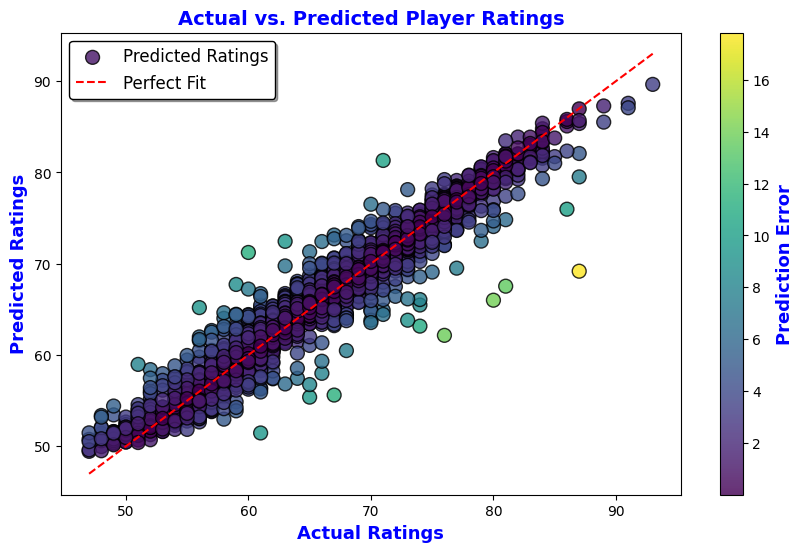

In [ ]:
#Visualization of the model performance

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
y_pred = y_pred.flatten()
colors = np.abs(y_test - y_pred)
# Plot actual vs predicted ratings
# Scatter Plot with Labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_test,
                      y_pred, c=colors,
                      cmap="viridis",
                      edgecolors="black",
                      s=100,
                      alpha=0.81,
                      label="Predicted Ratings"

                      )

# Adding Colorbar
cbar = plt.colorbar()
cbar.set_label("Prediction Error",
               color="blue",
               fontweight = "bold",
               fontsize=13,
               )

plt.title(
    "Actual vs. Predicted Player Ratings",
    color="blue",
    fontsize=14,
    fontweight="bold",

)

plt.xlabel("Actual Ratings",
           color="blue",
           fontweight ="bold",
           fontsize=13
           )
plt.ylabel("Predicted Ratings",
           color="blue",
           fontweight ="bold",
           fontsize=13,

           )

plt.plot([min(y_test),
          max(y_test)],
          [min(y_test),
           max(y_test)],
          linestyle="--",
          color="red",
          label="Perfect Fit",



          )
# Customizing the legend
plt.legend(
    loc="upper left",
    fontsize=12,
    title_fontsize=13,
    frameon=True,
    shadow=True,
    facecolor="white",
    edgecolor="black"
)

plt.show()

In [ ]:
!pip install eli5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107721 sha256=538875a791e854d62008419d40216d1c6f6f6436dcb8a559d3a4eb8ccfee42dd
  Stored in directory: /root/.cache/pip/wheels/ec/68/a9/de7d374ecb6f53462ce0eec8326fbab91b6228c82e67428d0d
Successfully built eli5


PermutationExplainer explainer: 3849it [22:24,  2.85it/s]
<ipython-input-49-c4506f55d03c>:7: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


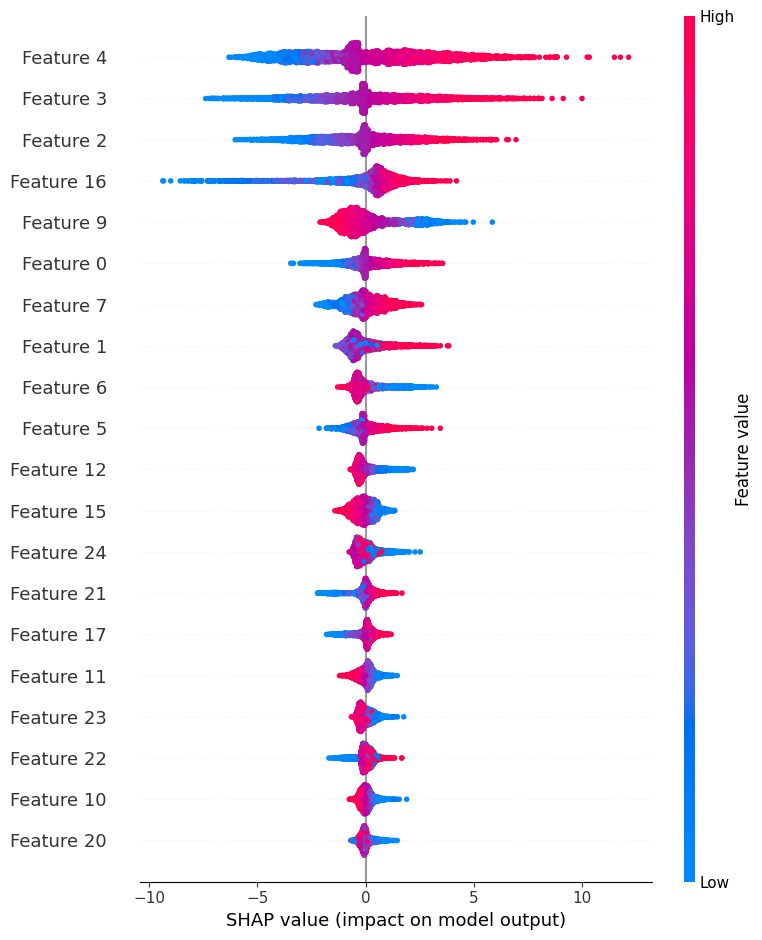

In [ ]:
!pip install shap
import shap

explainer = shap.Explainer(best_model, X_test)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

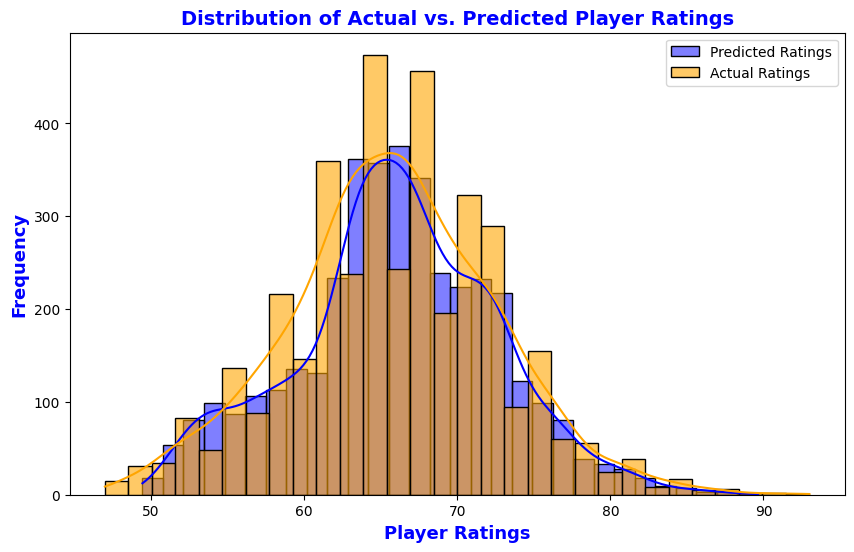

In [ ]:
import seaborn as sns

# Plot the distribution of predicted ratings
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, kde=True, color='blue', bins=30, label="Predicted Ratings")
sns.histplot(y_test, kde=True, color='orange', bins=30, label="Actual Ratings", alpha=0.6)

plt.title("Distribution of Actual vs. Predicted Player Ratings", fontsize=14, fontweight="bold", color="blue")
plt.xlabel("Player Ratings", fontsize=13, fontweight="bold", color="blue")
plt.ylabel("Frequency", fontsize=13, fontweight="bold", color="blue")
plt.legend()
plt.show()


**The end of Part 2**